In [28]:
import matplotlib as plt
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold


### Cargamos los conjuntos de datos

In [29]:
iris = pd.read_csv('iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [30]:
emails = pd.read_csv('emails.csv')
emails.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


Obtenemos los conjuntos de entrenamiento y prueba para Iris y Email

In [31]:
X_iris=iris.drop('species', axis=1)
y_iris=iris['species']

X_emails=emails.drop(['Email No.', 'Prediction'], axis=1)
y_emails=emails['Prediction']

X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.3, random_state=0)
X_train_emails, X_test_emails, y_train_emails, y_test_emails = train_test_split(X_emails, y_emails, test_size=0.3, random_state=0)

* Creamos una dataframe para adjuntar los resultados(tabla 1)

In [32]:
table = pd.DataFrame(columns=["Dataset", "Vecinos", "Pesos", "Pliegue", "Accuracy"])

* Creamos un dataframe para adjuntar los resultados (tabla 2)

In [33]:
resultados = pd.DataFrame(columns=["Dataset", "Clasificador", "Vecinos", "Pesos", "Distribución", "Accurracy"])

## Evaluamos los modelos para el dataset de iris

Hacemos la validación cruzada para 3 pliegues para el dataset de iris ***con parámetro 1-nn***

In [34]:
# Arreglo para guardar el accuracy
accuracy_iris_1n = []

# KFold
kf = KFold(n_splits=3)

#Modelo
model_1nn = KNeighborsClassifier(n_neighbors=1)
i=1
for train_index, test_index in kf.split(X_train_iris):
    X_train, X_test = X_train_iris.iloc[train_index], X_train_iris.iloc[test_index]
    y_train, y_test = y_train_iris.iloc[train_index], y_train_iris.iloc[test_index]

    model_1nn.fit(X_train, y_train)
    y_pred = model_1nn.predict(X_test)
    
    accuracy_iris_1n.append(accuracy_score(y_test, y_pred))
    
    table = pd.concat([table, pd.DataFrame({
    "Dataset": ["iris.csv"],
    "Vecinos": ["1"],
    "Pesos": ["--------"],
    "Pliegue": [i],
    "Accuracy": [accuracy_score(y_test, y_pred)]
    })], ignore_index=True)
    i+=1

table = pd.concat([table, pd.DataFrame({
"Dataset": ["iris.csv"],
"Vecinos": ["1"],
"Pesos": ["--------"],
"Pliegue": ["Promedio"],
"Accuracy": [np.mean(accuracy_iris_1n)]
})], ignore_index=True)

print(accuracy_iris_1n)
mean_accuracy_iris_1n=np.mean(accuracy_iris_1n)
print("Mean Accuracy Iris: ", np.mean(accuracy_iris_1n))


[0.8571428571428571, 1.0, 0.9428571428571428]
Mean Accuracy Iris:  0.9333333333333332


 Hacemos la validación cruzada para 3 pliegues para el dataset de iris con ***parámetros 10 nn y weights = distance***

In [35]:
# Arreglo para guardar el accuracy
accuracy_iris_10n_dist = []

# KFold
kf = KFold(n_splits=3)

#Modelo
model_10n_dist = KNeighborsClassifier(n_neighbors=10,weights='distance')
i=1
for train_index, test_index in kf.split(X_train_iris):
    X_train, X_test = X_train_iris.iloc[train_index], X_train_iris.iloc[test_index]
    y_train, y_test = y_train_iris.iloc[train_index], y_train_iris.iloc[test_index]

    model_10n_dist.fit(X_train, y_train)
    y_pred = model_10n_dist.predict(X_test)

    accuracy_iris_10n_dist.append(accuracy_score(y_test, y_pred))
    
    table = pd.concat([table, pd.DataFrame({
    "Dataset": ["iris.csv"],
    "Vecinos": ["10"],
    "Pesos": ["Distance"],
    "Pliegue": [i],
    "Accuracy": [accuracy_score(y_test, y_pred)]
    })], ignore_index=True)
    i+=1

table = pd.concat([table, pd.DataFrame({
"Dataset": ["iris.csv"],
"Vecinos": ["10"],
"Pesos": ["Distance"],
"Pliegue": ["Promedio"],
"Accuracy": [np.mean(accuracy_iris_10n_dist)]
})], ignore_index=True)

print(accuracy_iris_10n_dist)
mean_accuracy_iris_10n_dist=np.mean(accuracy_iris_10n_dist)
print("Mean Accuracy Iris: ", np.mean(accuracy_iris_10n_dist))

[0.9142857142857143, 1.0, 0.9142857142857143]
Mean Accuracy Iris:  0.9428571428571427


 Hacemos la validación cruzada para 3 pliegues para el dataset de iris con ***parámetros 10 nn y weights = uniform***

In [36]:
# Arreglo para guardar el accuracy
accuracy_iris_10n_uni = []

# KFold
kf = KFold(n_splits=3)

#Modelo
model_10n_uni = KNeighborsClassifier(n_neighbors=10,weights='uniform')
i=1
for train_index, test_index in kf.split(X_train_iris):
    X_train, X_test = X_train_iris.iloc[train_index], X_train_iris.iloc[test_index]
    y_train, y_test = y_train_iris.iloc[train_index], y_train_iris.iloc[test_index]

    model_10n_uni.fit(X_train, y_train)
    y_pred = model_10n_uni.predict(X_test)
    accuracy_iris_10n_uni.append(accuracy_score(y_test, y_pred))

    table = pd.concat([table, pd.DataFrame({
    "Dataset": ["iris.csv"],
    "Vecinos": ["10"],
     "Pesos": ["Uniform"],
    "Pliegue": [i],
    "Accuracy": [accuracy_score(y_test, y_pred)]
    })], ignore_index=True)
    i+=1

table = pd.concat([table, pd.DataFrame({
"Dataset": ["iris.csv"],
"Vecinos": ["10"],
"Pesos": ["Uniform"],
"Pliegue": ["Promedio"],
"Accuracy": [np.mean(accuracy_iris_10n_uni)]
})], ignore_index=True)

print(accuracy_iris_10n_uni)
mean_accuracy_iris_10n_uni=np.mean(accuracy_iris_10n_uni)
print("Mean Accuracy Iris: ", np.mean(accuracy_iris_10n_uni))

[0.9142857142857143, 1.0, 0.9142857142857143]
Mean Accuracy Iris:  0.9428571428571427


### Obtenemos el mejor modelo para entrenar los datos de Iris

In [37]:
print("Mean Accuracy Iris 1nn: ", mean_accuracy_iris_1n)
print("Mean Accuracy Iris 10n_dist: ", mean_accuracy_iris_10n_dist)
print("Mean Accuracy Iris 10n_uni: ", mean_accuracy_iris_10n_uni)

Mean Accuracy Iris 1nn:  0.9333333333333332
Mean Accuracy Iris 10n_dist:  0.9428571428571427
Mean Accuracy Iris 10n_uni:  0.9428571428571427


In [38]:
#Si el mejor modelo es 1nn
if (mean_accuracy_iris_1n > mean_accuracy_iris_10n_dist) and (mean_accuracy_iris_1n > mean_accuracy_iris_10n_uni):
    print("El mejor modelo es 1nn")
    model_1nn.fit(X_train_iris, y_train_iris)
    y_pred_iris = model_1nn.predict(X_test_iris)
    accuracy_f = accuracy_score(y_test, y_pred_iris)

#Si el mejor modelo es 10n_dist
elif (mean_accuracy_iris_10n_dist > mean_accuracy_iris_1n) and (mean_accuracy_iris_10n_dist > mean_accuracy_iris_10n_uni):
    print("El mejor modelo es 10n_dist")
    model_10n_dist.fit(X_train_iris, y_train_iris)
    y_pred_iris = model_10n_dist.predict(X_test_iris)
    accuracy_f = accuracy_score(y_test, y_pred_iris)

#Si el mejor modelo es 10n_uni
elif (mean_accuracy_iris_10n_uni > mean_accuracy_iris_1n) and (mean_accuracy_iris_10n_uni > mean_accuracy_iris_10n_dist):
    print("El mejor modelo es 10n_uni")
    model_10n_uni.fit(X_train_iris, y_train_iris)
    y_pred_iris = model_10n_uni.predict(X_test_iris)
    accuracy_f = accuracy_score(y_test, y_pred_iris)
else:
    print("Hay empate")
    model_10n_uni.fit(X_train_iris, y_train_iris)
    y_pred_iris = model_10n_uni.predict(X_test_iris)
    accuracy_f = accuracy_score(y_test_iris, y_pred_iris)

Hay empate


In [39]:
model_GNN = GaussianNB()
model_GNN.fit(X_train_iris, y_train_iris)
y_pred_iris_GNB = model_GNN.predict(X_test_iris)
accuracy_GNB = accuracy_score(y_test_iris, y_pred_iris_GNB)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



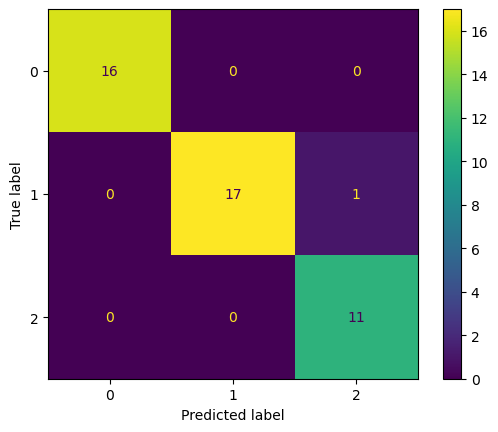

In [40]:
print(classification_report(y_test_iris, y_pred_iris))
cm_irirs = confusion_matrix(y_test_iris, y_pred_iris)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_irirs)
disp.plot()

## Evaluamos el modelo para el dataset emails

Hacemos la validación cruzada para 3 pliegues para el dataset de emails ***con parámetro 1-nn***

In [41]:
# Arreglo para guardar el accuracy
accuracy_emails_1n = []

# KFold
kf = KFold(n_splits=3)

#Modelo
model_1nn = KNeighborsClassifier(n_neighbors=1)
i=1
for train_index, test_index in kf.split(X_train_emails):

    X_train, X_test = X_train_emails.iloc[train_index], X_train_emails.iloc[test_index]
    y_train, y_test = y_train_emails.iloc[train_index], y_train_emails.iloc[test_index]

    X_train = np.ascontiguousarray(X_train)
    X_test = np.ascontiguousarray(X_test)
    y_train = np.ascontiguousarray(y_train)
    y_test = np.ascontiguousarray(y_test)
    
    model_1nn.fit(X_train, y_train)
    y_pred = model_1nn.predict(X_test)
    accuracy_emails_1n.append(accuracy_score(y_test, y_pred))

    table = pd.concat([table, pd.DataFrame({
    "Dataset": ["emails.csv"],
    "Vecinos": ["1"],
     "Pesos": ["--------"],
    "Pliegue": [i],
    "Accuracy": [accuracy_score(y_test, y_pred)]
    })], ignore_index=True)
    i+=1

table = pd.concat([table, pd.DataFrame({
"Dataset": ["emails.csv"],
"Vecinos": ["1"],
"Pesos": ["--------"],
"Pliegue": ["Promedio"],
"Accuracy": [np.mean(accuracy_emails_1n)]
})], ignore_index=True)
print(accuracy_emails_1n)
mean_accuracy_emails_1n=np.mean(accuracy_emails_1n)
print("Mean Accuracy Iris: ", np.mean(accuracy_emails_1n))

[0.8566694283347142, 0.8376139188069595, 0.8482587064676617]
Mean Accuracy Iris:  0.8475140178697784


Hacemos la validación cruzada para 3 pliegues para el dataset de emails ***con parámetro 10-nn y weights = distance***

In [42]:
# Arreglo para guardar el accuracy
accuracy_emails_10n_dist = []

# KFold
kf = KFold(n_splits=3)

#Modelo
model_10nn_dist = KNeighborsClassifier(n_neighbors=10, weights='distance')
i=1
for train_index, test_index in kf.split(X_train_emails):
    X_train, X_test = X_train_emails.iloc[train_index], X_train_emails.iloc[test_index]
    y_train, y_test = y_train_emails.iloc[train_index], y_train_emails.iloc[test_index]

    X_train = np.ascontiguousarray(X_train)
    X_test = np.ascontiguousarray(X_test)
    y_train = np.ascontiguousarray(y_train)
    y_test = np.ascontiguousarray(y_test)
    
    model_10nn_dist.fit(X_train, y_train)
    y_pred = model_10nn_dist.predict(X_test)
    
    accuracy_emails_10n_dist.append(accuracy_score(y_test, y_pred))

    table = pd.concat([table, pd.DataFrame({
    "Dataset": ["emails.csv"],
    "Vecinos": ["10"],
     "Pesos": ["Distance"],
    "Pliegue": [i],
    "Accuracy": [accuracy_score(y_test, y_pred)]
    })], ignore_index=True)
    i+=1

table = pd.concat([table, pd.DataFrame({
"Dataset": ["emails.csv"],
"Vecinos": ["10"],
"Pesos": ["Distance"],
"Pliegue": ["Promedio"],
"Accuracy": [np.mean(accuracy_emails_10n_dist)]
})], ignore_index=True)
print(accuracy_emails_10n_dist)
mean_accuracy_emails_10n_dist=np.mean(accuracy_emails_10n_dist)
print("Mean Accuracy emails: ", np.mean(accuracy_emails_10n_dist))

[0.8765534382767192, 0.8492129246064622, 0.8698175787728026]
Mean Accuracy emails:  0.8651946472186612


Hacemos la validación cruzada para 3 pliegues para el dataset de emails ***con parámetro 10-nn y weights = uniform***

In [43]:
# Arreglo para guardar el accuracy
accuracy_emails_10n_uni = []

# KFold
kf = KFold(n_splits=3)

#Modelo
model_10nn_uni = KNeighborsClassifier(n_neighbors=10, weights='uniform')
i=1
for train_index, test_index in kf.split(X_train_emails):
    X_train2, X_test2 = X_train_emails.iloc[train_index], X_train_emails.iloc[test_index]
    y_train2, y_test2 = y_train_emails.iloc[train_index], y_train_emails.iloc[test_index]

    X_train2 = np.ascontiguousarray(X_train2)
    X_test2 = np.ascontiguousarray(X_test2)
    y_train2 = np.ascontiguousarray(y_train2)
    y_test2 = np.ascontiguousarray(y_test2)
    
    model_10nn_uni.fit(X_train2, y_train2)
    y_pred2 = model_10nn_uni.predict(X_test2)
    
    accuracy_emails_10n_uni.append(accuracy_score(y_test2, y_pred2))

    table = pd.concat([table, pd.DataFrame({
    "Dataset": ["emails.csv"],
    "Vecinos": ["10"],
     "Pesos": ["Uniform"],
    "Pliegue": [i],
    "Accuracy": [accuracy_score(y_test2, y_pred2)]
    })], ignore_index=True)
    i+=1

table = pd.concat([table, pd.DataFrame({
"Dataset": ["emails.csv"],
"Vecinos": ["10"],
"Pesos": ["Uniform"],
"Pliegue": ["Promedio"],
"Accuracy": [np.mean(accuracy_emails_10n_uni)]
})], ignore_index=True)

print(accuracy_emails_10n_uni)
mean_accuracy_emails_10n_uni=np.mean(accuracy_emails_10n_uni)
print("Mean Accuracy Emails: ", np.mean(accuracy_emails_10n_uni))

[0.875724937862469, 0.8475559237779619, 0.8606965174129353]
Mean Accuracy Emails:  0.8613257930177888


## Obtenemos el mejor modelo para entrenar los datos de Emails

In [44]:
print("Mean Accuracy Emails 1nn: ", mean_accuracy_emails_1n)
print("Mean Accuracy Emails 10n_dist: ", mean_accuracy_emails_10n_dist)
print("Mean Accuracy Emails 10n_uni: ", mean_accuracy_emails_10n_uni)


Mean Accuracy Emails 1nn:  0.8475140178697784
Mean Accuracy Emails 10n_dist:  0.8651946472186612
Mean Accuracy Emails 10n_uni:  0.8613257930177888


In [45]:
# Si el mejor modelo es 1nn
if (mean_accuracy_emails_1n > mean_accuracy_emails_10n_dist) and (mean_accuracy_emails_1n > mean_accuracy_emails_10n_uni):
    print("El mejor modelo es 1nn")
    model_1nn.fit(X_train_emails, y_train_emails)
    y_pred_emails=model_1nn.predict(X_test_emails)
    accuracy_fin2 = accuracy_score(y_test_emails, y_pred_emails)
# Si el mejor modelo es 10n_dist
elif (mean_accuracy_emails_10n_dist > mean_accuracy_emails_1n) and (mean_accuracy_emails_10n_dist > mean_accuracy_emails_10n_uni):
    print("El mejor modelo es 10n_dist")
    model_10nn_dist.fit(X_train_emails, y_train_emails)
    y_pred_emails = model_10nn_dist.predict(X_test_emails)
    accuracy_fin2 = accuracy_score(y_test_emails, y_pred_emails)
# Si el mejor modelo es 10n_uni
elif (mean_accuracy_emails_10n_uni > mean_accuracy_emails_1n) and (mean_accuracy_emails_10n_uni > mean_accuracy_emails_10n_dist):
    print("El mejor modelo es 10n_uni")
    model_10nn_uni.fit(X_train_emails, y_train_emails)
    y_pred_emails = model_10nn_uni.predict(X_test_emails)
    accuracy_fin2 = accuracy_score(y_test_emails, y_pred_emails)
else:
    print("Hay empate")
    model_10nn_uni.fit(X_train_emails, y_train_emails)
    y_pred_emails = model_10nn_uni.predict(X_test_emails)
    accuracy_fin2 = accuracy_score(y_test_emails, y_pred_emails)

El mejor modelo es 10n_dist


In [46]:
model_gnn_e = GaussianNB()
model_gnn_e.fit(X_train_emails, y_train_emails)
y_pred_emails_GNB = model_gnn_e.predict(X_test_emails)
accuracy_f2 = accuracy_score(y_test_emails, y_pred_emails_GNB)

              precision    recall  f1-score   support

           0       0.93      0.88      0.90      1111
           1       0.74      0.83      0.78       441

    accuracy                           0.87      1552
   macro avg       0.83      0.85      0.84      1552
weighted avg       0.87      0.87      0.87      1552



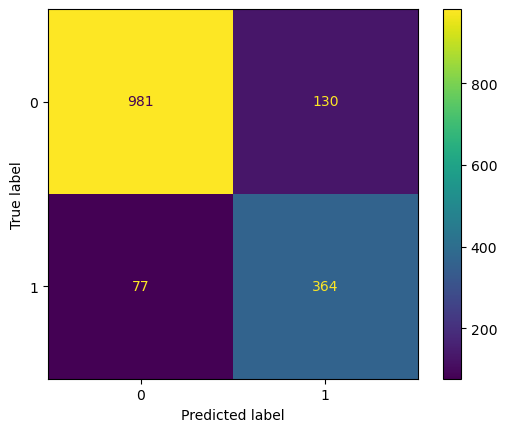

In [47]:
print(classification_report(y_test_emails, y_pred_emails))
cm_emails = confusion_matrix(y_test_emails, y_pred_emails)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_emails)
disp.plot()


## Imprimir los resultados

# Tabla 1

In [48]:
table

,Dataset,Vecinos,Pesos,Pliegue,Accuracy
0,iris.csv,1,--------,1,0.857143
1,iris.csv,1,--------,2,1.000000
2,iris.csv,1,--------,3,0.942857
3,iris.csv,1,--------,Promedio,0.933333
4,iris.csv,10,Distance,1,0.914286
5,iris.csv,10,Distance,2,1.000000
6,iris.csv,10,Distance,3,0.914286
7,iris.csv,10,Distance,Promedio,0.942857
8,iris.csv,10,Uniform,1,0.914286
9,iris.csv,10,Uniform,2,1.000000


# Tabla 2

In [49]:
resultados = pd.concat([resultados, pd.DataFrame({
    "Dataset": ["iris.csv", "iris.csv"],
    "Clasificador": ["Naive Bayes", "K-NN"],
    "Vecinos" : ["------", "10"],
    "Pesos" : ["------", "Uniforme"],
    "Distribución": ["Normal", "------"],
    "Accurracy": [accuracy_GNB,accuracy_f]
})], ignore_index=True)

resultados = pd.concat([resultados, pd.DataFrame({
    "Dataset": ["emails.csv", "emails.csv"],
    "Clasificador": ["Naive Bayes", "K-NN"],
    "Vecinos" : ["------", "10"],
    "Pesos" : ["------", "Distancia"],
    "Distribución": ["Normal", "------"],
    "Accurracy": [accuracy_f2, accuracy_fin2]
})], ignore_index=True)

In [50]:
resultados

,Dataset,Clasificador,Vecinos,Pesos,Distribución,Accurracy
0,iris.csv,Naive Bayes,------,------,Normal,1.000000
1,iris.csv,K-NN,10,Uniforme,------,0.977778
2,emails.csv,Naive Bayes,------,------,Normal,0.948454
3,emails.csv,K-NN,10,Distancia,------,0.866624


### Resultados de confusión para iris 10 nn

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



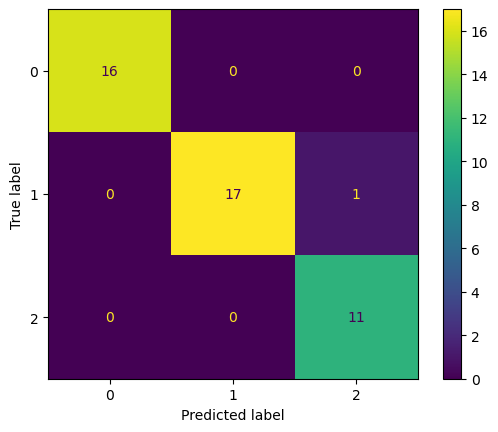

In [51]:
print(classification_report(y_test_iris, y_pred_iris))
cm_iris=confusion_matrix(y_test_iris, y_pred_iris)
disp=ConfusionMatrixDisplay(confusion_matrix=cm_iris)
disp.plot()



### Resultados de confusión para iris GNB

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



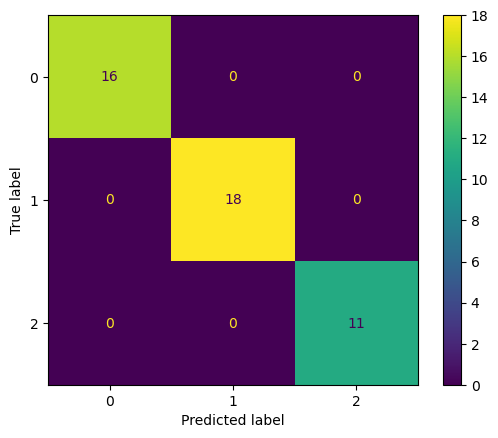

In [52]:
print(classification_report(y_test_iris, y_pred_iris_GNB))
cm_iris=confusion_matrix(y_test_iris, y_pred_iris_GNB)
disp=ConfusionMatrixDisplay(confusion_matrix=cm_iris)
disp.plot()

### Resultados para emails 10 nn

              precision    recall  f1-score   support

           0       0.93      0.88      0.90      1111
           1       0.74      0.83      0.78       441

    accuracy                           0.87      1552
   macro avg       0.83      0.85      0.84      1552
weighted avg       0.87      0.87      0.87      1552



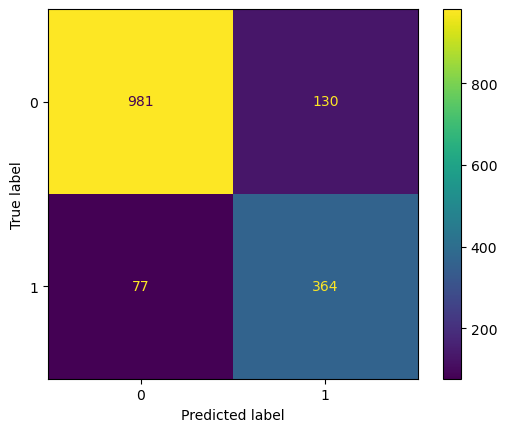

In [53]:
print(classification_report(y_test_emails, y_pred_emails))
cm_emails=confusion_matrix(y_test_emails, y_pred_emails)
disp=ConfusionMatrixDisplay(confusion_matrix=cm_emails)
disp.plot()

### Resultados de confusión para emails GNB

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1111
           1       0.88      0.95      0.91       441

    accuracy                           0.95      1552
   macro avg       0.93      0.95      0.94      1552
weighted avg       0.95      0.95      0.95      1552



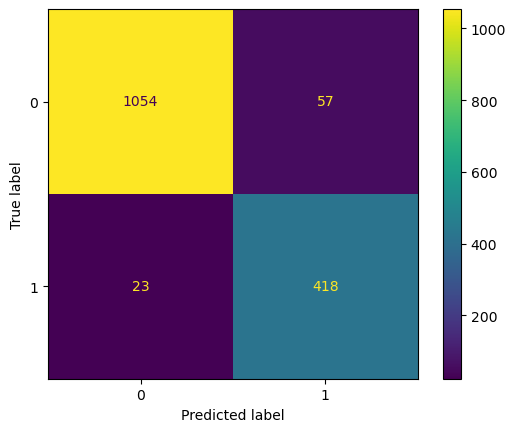

In [54]:
print(classification_report(y_test_emails,y_pred_emails_GNB))
cm_emails=confusion_matrix(y_test_emails,y_pred_emails_GNB)
disp=ConfusionMatrixDisplay(confusion_matrix=cm_emails)
disp.plot()